In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf

from src.util import (
    get_data, 
    CharacterTranslator,
)
from src.model import (
    get_convolutional_model
)
from src.util import plot_loss_accuracy

In [2]:
X_train, X_test, y_train, y_test = get_data()

In [3]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [4]:
char_translator = CharacterTranslator()
char_translator.fit(X_train)

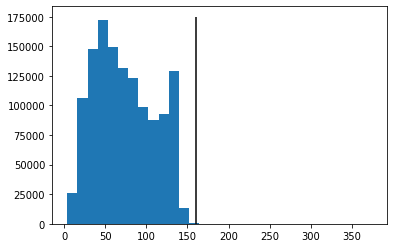

In [5]:
plt.hist(char_translator.seq_sizes, bins=30);
plt.vlines(160, 0, 175000);
plt.

In [6]:
X_train_encoded = char_translator.transform(X_train, maxlen=160)
X_test_encoded = char_translator.transform(X_test, maxlen=160)

In [7]:
char_translator.str_to_token.keys()

dict_keys(['<start>', '<pad>', '<OOV>', ' ', 'e', 't', 'o', 'a', 'i', 'n', 's', 'r', 'h', 'l', 'd', 'm', 'u', 'y', 'g', 'w', 'c', '.', 'p', 'f', 'b', 'k', '!', 'v', '@', "'", ',', 'j', '/', 'x', '?', 'z', ';', '-', '&', '1', ':', '2', 'q', '0', '3', '_', '4', '5', '6', '8', '7', '9', ')', '#', '(', '*', 'ð', '=', 'â', '~', '½', '$', '¿', 'ñ', '+', 'ï', 'ã', ']', '\x99', '\x80', '^', '[', '¸', '|', '%', '´', '°', '¾', 'à', 'µ', '\x82', '¥', '`', '»', 'º', '«', 'á', '£', 'ø', 'ì', 'ù', '²', '¼', '\x83', '\\', '¡', '©', 'ä', '¹', '\x84', '±', 'ë', '³', '×', '§', '¬', '\x88', '\x8b', '\x87', '¤', 'å', '\x8c', '¦', 'ª', '¶', '·', '\xa0', '\x95', 'î', '\xad', '\x91', 'æ', '\x9c', '\x98', '\x94', '}', '\x8a', '{', '¯', '\x86', '\x93', '\x85', 'ê', '¢', '¨', '®', '\x9f', '\x89', '\x9a', '\x96', '\x8e', '\x9b', 'í', '\x97', '\x9e', 'è', 'é', 'ç', '\x92', '\t', 'û', '\x7f', 'ú', 'ó', 'ò', 'ß'])

In [8]:
print('Raw:')
print(X_train[4])
print('\n','_______________________','\n')
print('Encoded:')
print(X_train_encoded[4])
print('\n','_______________________','\n')
print('Reverse Transformed:')
print(char_translator.inverse_transform(X_train_encoded[4:5]))

Raw:
upper airways problem 

 _______________________ 

Encoded:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16 22 22  4 11  3
  7  8 11 19  7 17 10  3 22 11  6 24 13  4 15  3]

 _______________________ 

Reverse Transformed:
['<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [9]:
model = get_convolutional_model(char_translator.vocab_size,
                                160, 
                                2)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
character_embedding (Embeddi (None, 160, 300)          46800     
_________________________________________________________________
input_dropout (Dropout)      (None, 160, 300)          0         
_________________________________________________________________
conv_1 (Conv1D)              (None, 154, 256)          537856    
_________________________________________________________________
pooling_1 (MaxPooling1D)     (None, 51, 256)           0         
_________________________________________________________________
conv_2 (Conv1D)              (None, 45, 256)           459008    
_________________________________________________________________
pooling_2 (MaxPooling1D)     (None, 15, 256)           0         
_________________________________________________________________
conv_3 (Conv1D)              (None, 13, 256)           1

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2)

hist = model.fit(X_train_encoded, y_train,
          validation_data=(X_test_encoded, y_test),
          epochs=15, batch_size=1000,
          callbacks=[es])

Epoch 1/15
1280/1280 [==============================] - 321s 251ms/step - loss: 0.4947 - accuracy: 0.7455 - val_loss: 0.4186 - val_accuracy: 0.8079
Epoch 2/15
1280/1280 [==============================] - 313s 245ms/step - loss: 0.4089 - accuracy: 0.8132 - val_loss: 0.4006 - val_accuracy: 0.8172
Epoch 3/15
1280/1280 [==============================] - 308s 241ms/step - loss: 0.3873 - accuracy: 0.8254 - val_loss: 0.3940 - val_accuracy: 0.8218
Epoch 4/15
1280/1280 [==============================] - 308s 241ms/step - loss: 0.3701 - accuracy: 0.8343 - val_loss: 0.3936 - val_accuracy: 0.8220
Epoch 5/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.3552 - accuracy: 0.8423 - val_loss: 0.4018 - val_accuracy: 0.8204
Epoch 6/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.3406 - accuracy: 0.8497 - val_loss: 0.3994 - val_accuracy: 0.8208


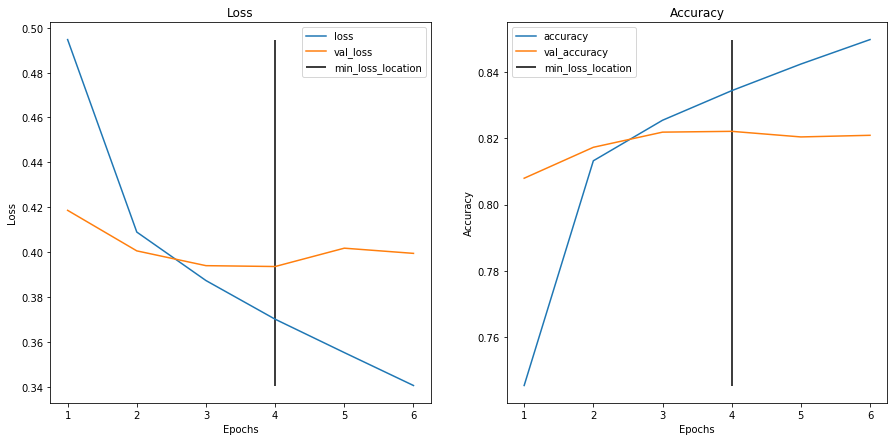

In [16]:
plot_loss_accuracy(hist)